In [31]:
from astropy.io.votable import parse_single_table
from astropy.table import Table
table = Table(parse_single_table('/Users/yaolun/GoogleDrive/research/bhr71/bhr71_3arcmin_radius_Gaia_DR2.vot').array)

In [33]:
table

source_id,ra,ra_error,dec,dec_error,parallax,parallax_error,phot_g_mean_mag,bp_rp,radial_velocity,radial_velocity_error,phot_variable_flag,teff_val,a_g_val
int64,float64,float64,float64,float64,float64,float64,float32,float32,float64,float64,object,float32,float32
6053192285528230016,180.354852814,0.0842457787161,-65.1786378589,0.102469300103,0.887373828027,0.102882243601,17.6428,1.86347,--,--,NOT_AVAILABLE,--,--
6053194828150238080,180.291417629,0.174811039924,-65.1456747233,0.188413323917,0.0425245669997,0.228037692038,18.6628,2.71278,--,--,NOT_AVAILABLE,--,--
6053192289866950016,180.363538334,0.0494935717394,-65.1831590787,0.0660894394329,0.348164663646,0.0723212853036,16.5574,1.41594,--,--,NOT_AVAILABLE,4475.0,--
6053193045781195008,180.374398441,0.357477523245,-65.1693677892,0.5444609316,0.157835110372,0.563447807255,19.692,2.40505,--,--,NOT_AVAILABLE,--,--
6053191563986959616,180.315091214,0.355799345162,-65.1780885286,0.407751847786,0.151719817628,0.56323893207,19.571,1.53306,--,--,NOT_AVAILABLE,--,--
6053193110163309440,180.333653674,0.125737217617,-65.1605561401,0.148259034499,0.311307650598,0.162117782799,18.3164,1.98587,--,--,NOT_AVAILABLE,--,--
6053193595517580672,180.505556013,1.12716185777,-65.1262320003,1.40478959419,4.39504194874,1.60947353917,20.7888,1.84218,--,--,NOT_AVAILABLE,--,--
6053192255487661056,180.413130926,1.1334430276,-65.1746883266,1.37368122245,1.33047922443,1.74650757819,20.674,1.83493,--,--,NOT_AVAILABLE,--,--
6053192289850469248,180.369871568,1.01644420407,-65.1807754375,1.64458088816,1.61926909682,1.75937514479,20.7426,0.539631,--,--,NOT_AVAILABLE,--,--


In [52]:
from astropy.coordinates import SkyCoord
from astropy import units as u
import numpy as np

bhr71 = SkyCoord('12 01 36.4988 -65 08 49.3819', unit=(u.hourangle, u.deg))

table['separation'] = [bhr71.separation(SkyCoord(str(ra), str(dec), frame='icrs', unit=(u.deg, u.deg))).arcsecond for i, (ra, dec) in enumerate(zip(table['ra'], table['dec']))]

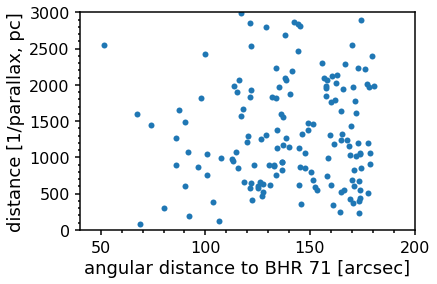

In [68]:
%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(table['separation'], 1e3/table['parallax'], marker='o', mec='None', linestyle='None')
ax.set_ylim([0,3000])
ax.set_xlim([40,200])

ax.set_xlabel('angular distance to BHR 71 [arcsec]', fontsize=18)
ax.set_ylabel('distance [1/parallax, pc]', fontsize=18)
ax.tick_params('both',labelsize=16,width=1.5,which='major',pad=5,length=5)
ax.tick_params('both',labelsize=16,width=1.5,which='minor',pad=5,length=2.5)

[ax.spines[axis].set_linewidth(1.5) for axis in ['top','bottom','left','right']]
ax.minorticks_on()